In [26]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [105]:
# Package intended to work with arrays
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

In [41]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# 1.Load Dataset

In [149]:
h5f=h5py.File('D:/Python_notebooks/Neural_Networks/Project/SVHN_single_grey1.h5','r')

# 2.Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

In [150]:
#Splitting into data into train and test stages.
#Fitting the model on Train data and testing of accuracy and loss on test data 

# 3.Data fetching and understand the train/val/test splits

In [151]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]

X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [152]:
print(X_train.shape) ##Training set size
print(y_train.shape)  #Training set lables 

(42000, 32, 32)
(42000,)


In [153]:
print(X_test.shape) #Test set size
print(y_test.shape)  # Test set lables

(18000, 32, 32)
(18000,)


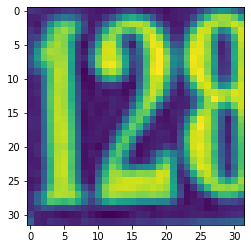

Label:  2


In [171]:

plt.imshow(X_train[0])    # show first number in the dataset
plt.show()

print( 'Label: ', y_train[0]) # It's label

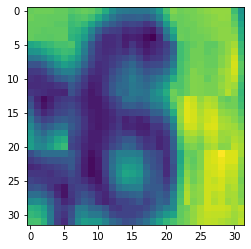

Label 6


In [169]:

plt.imshow(X_train[20])    # show first number in the dataset
plt.show()

print( 'Label',y_train[20]) # It's label

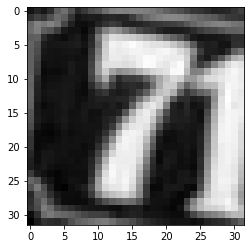

Label:  7


In [168]:
plt.imshow(X_train[5000],cmap="gray")    # show first number in the dataset
plt.show()

print( 'Label: ',y_train[5000]) # It's label



Data Pre-processing

In [61]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [62]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


# 4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (25 points) 

In [68]:
# Here building NN with 3 hidden layers, relu as Activation function, sgd as an optimizer, and 50 as hidden nurons
#   softmax as activation function at last stage due to the multi classifier, categorical_crossentropy as loss function and learning rate 0.001

def svhn_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [69]:
model = svhn_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
1313/1313 [==============================] - 1s 778us/step - loss: 2.9514 - accuracy: 0.0994
Epoch 2/10
1313/1313 [==============================] - 1s 740us/step - loss: 2.3018 - accuracy: 0.0999
Epoch 3/10
1313/1313 [==============================] - 1s 728us/step - loss: 2.3013 - accuracy: 0.1021
Epoch 4/10
1313/1313 [==============================] - 1s 752us/step - loss: 2.3025 - accuracy: 0.1016
Epoch 5/10
1313/1313 [==============================] - 1s 760us/step - loss: 2.3024 - accuracy: 0.1005
Epoch 6/10
1313/1313 [==============================] - 1s 752us/step - loss: 2.3023 - accuracy: 0.1019
Epoch 7/10
1313/1313 [==============================] - 1s 741us/step - loss: 2.3014 - accuracy: 0.1056
Epoch 8/10
1313/1313 [==============================] - 1s 748us/step - loss: 2.2929 - accuracy: 0.1161
Epoch 9/10
1313/1313 [==============================] - 1s 755us/step - loss: 2.2750 - accuracy: 0.1246
Epoch 10/10
1313/1313 [==============================] - 1s 771u

In [71]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 0s 589us/step - loss: 2.2663 - accuracy: 0.1261


In [72]:
##For the above Model,  loss: 2.2663 - accuracy: 0.1261.Both are not up to the mark 
#loss is high  and  accuracy is low

print('Test accuracy: ', results[1])

Test accuracy:  0.12611110508441925


# 5.Implement batch normalization for training the neural network

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
Normalize each mini-batch before nonlinearity
Batch normalization layer is usually inserted after dense/convolution and before nonlinearity


In [74]:
    def svhn_batch_model():
        model = Sequential()

        model.add(Dense(50, input_shape = (1024, )))
        model.add(BatchNormalization())                    
        model.add(Activation('relu'))    
        model.add(Dense(50))
        model.add(BatchNormalization())                    
        model.add(Activation('relu'))    
        model.add(Dense(50))
        model.add(BatchNormalization())                    
        model.add(Activation('relu'))    
        model.add(Dense(50))
        model.add(BatchNormalization())                    
        model.add(Activation('relu'))    
        model.add(Dense(10))
        model.add(Activation('softmax'))

        sgd = optimizers.SGD(lr = 0.001)
        model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

        return model

In [76]:
model = svhn_batch_model()
history1 = model.fit(X_train, y_train, epochs = 50, verbose = 1) ## Running for 50 Epochs


Epoch 1/50
1313/1313 [==============================] - 1s 1ms/step - loss: 2.3984 - accuracy: 0.1343
Epoch 2/50
1313/1313 [==============================] - 1s 1ms/step - loss: 2.1636 - accuracy: 0.2285
Epoch 3/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.9844 - accuracy: 0.3172
Epoch 4/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.8303 - accuracy: 0.3875
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.7030 - accuracy: 0.4409
Epoch 6/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.5983 - accuracy: 0.4796
Epoch 7/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.5053 - accuracy: 0.5168
Epoch 8/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.4408 - accuracy: 0.5365
Epoch 9/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.3847 - accuracy: 0.5589
Epoch 10/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.332

In [77]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 0s 660us/step - loss: 0.8349 - accuracy: 0.7466


In [79]:
print('Test accuracy: ', results[1])  ## After 50 epochs, model provided 74 % accuracy on the test.

Test accuracy:  0.7466111183166504


Optimization:

# Here NN is implemented with Dropout, weight initializer,adam optimizer along with batch normalization to improve accuracy and reduce the loss

In [94]:
def svhn_batch_optimized_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [97]:
model = svhn_batch_optimized_model()
history2 = model.fit(X_train, y_train, epochs = 50, verbose = 1)


Epoch 1/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.8170 - accuracy: 0.3674
Epoch 2/50
1313/1313 [==============================] - 9s 7ms/step - loss: 1.2983 - accuracy: 0.5766
Epoch 3/50
1313/1313 [==============================] - 9s 7ms/step - loss: 1.1500 - accuracy: 0.6311
Epoch 4/50
1313/1313 [==============================] - 9s 7ms/step - loss: 1.0655 - accuracy: 0.6595
Epoch 5/50
1313/1313 [==============================] - 9s 7ms/step - loss: 1.0190 - accuracy: 0.6752
Epoch 6/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.9657 - accuracy: 0.6949
Epoch 7/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.9264 - accuracy: 0.7087
Epoch 8/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.8936 - accuracy: 0.7167
Epoch 9/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.8696 - accuracy: 0.7253
Epoch 10/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.840

In [102]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8706


# 6.Print the classification accuracy metrics

In [103]:
#This model provided accuracy with 87% and loss with 0.436
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.4360351264476776, 0.870555579662323]


For NN, that contains 50 Hidden neurons and with relu as the activation function, and with 10 Epochs, the Model provided the accuracy 12 % and loss  as 2.2635

But NN that implemented with Dropout, weight initializer,adam optimizer, 50 epochs, 200 hidden neurons along with batch normalization improved accuracy and reduce the loss to 87% and 0.43 respectively.